In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
# Plane U
z_u = 0.0
n_u = 20
size_u = 10.0
pitch_u = size_u / n_u

# Plane V
z_v = 265.0
n_v = 1080
size_v = 540.0
pitch_v = size_v / n_v

# Plane A
z_a = 8.0
n_a = 12*1 # 48
size_a = 24.0
pitch_a = size_a / n_a

# Plane B
z_b = 136.0
n_b = 140*1 # 560
size_b = 280.0
pitch_b = size_b / n_b

# Retina plane
z_r = 1.0
n_r = 1024
size_r = 2.0
pitch_r = size_r / n_r

# Field of view
fov_factor = size_r / z_r
fov = 2 * np.arctan(fov_factor / 2) * 180/np.pi

# Pupil plane
z_p = 0.0
size_p = 8.0

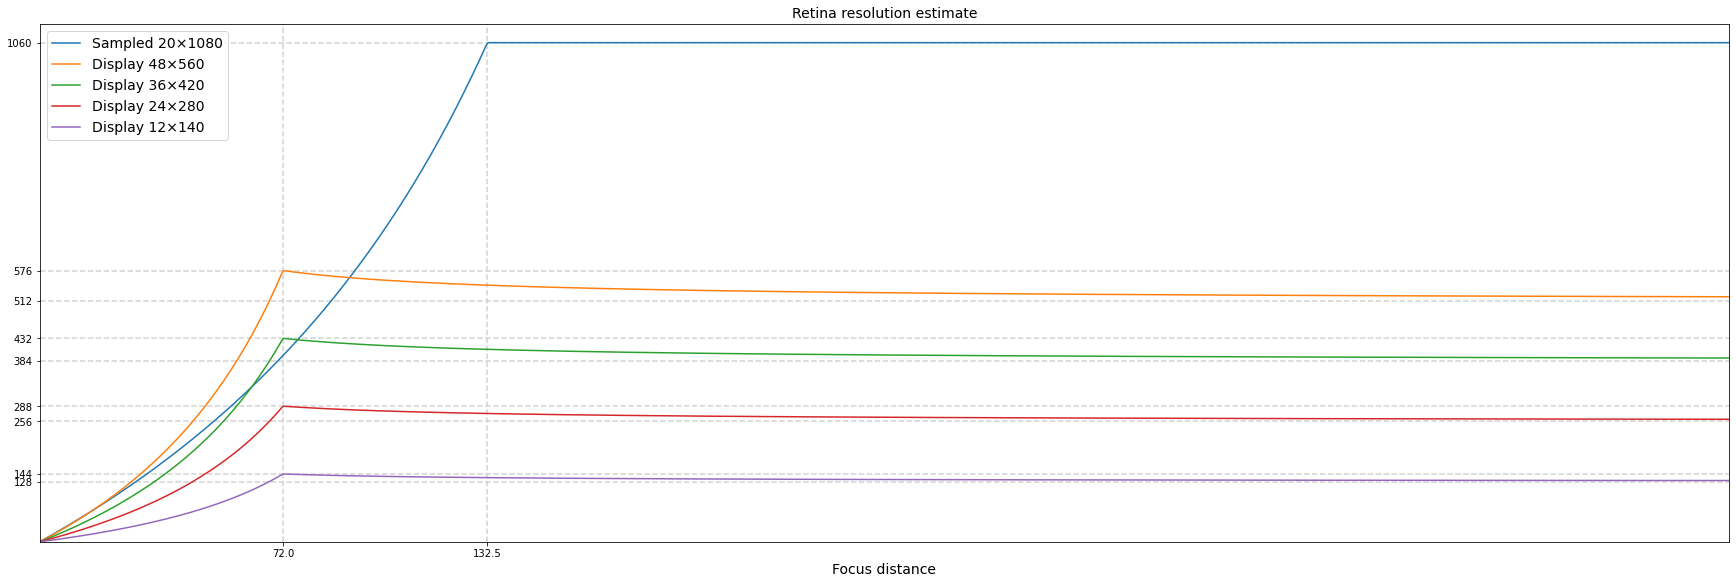

In [3]:
z_f = np.linspace(0.1, 500.0, num=1000)
z_f_uv = (z_u + z_v)/2
z_f_ab = (z_a + z_b)/2

n_r_u = np.reciprocal(np.abs(1 - z_v/z_f)) * fov_factor * abs(z_u - z_v) / pitch_u
n_r_v = np.reciprocal(np.abs(1 - z_u/z_f)) * fov_factor * abs(z_u - z_v) / pitch_v
n_r_uv = np.minimum(n_r_u, n_r_v)

n_r_uv_opt = fov_factor * abs(z_u + z_v) / max(pitch_u, pitch_v)
n_r_uv_inf = fov_factor * abs(z_u - z_v) / max(pitch_u, pitch_v)

n_r_a = np.reciprocal(np.abs(1 - z_b/z_f)) * fov_factor * abs(z_a - z_b) / pitch_a
n_r_b = np.reciprocal(np.abs(1 - z_a/z_f)) * fov_factor * abs(z_a - z_b) / pitch_b
n_r_ab = np.minimum(n_r_a, n_r_b)

n_r_ab_opt = fov_factor * abs(z_a + z_b) / max(pitch_a, pitch_b)
n_r_ab_inf = fov_factor * abs(z_a - z_b) / max(pitch_a, pitch_b)


fig, ax = pyplot.subplots(constrained_layout=True, figsize=(24, 8))

ax.set_title('Retina resolution estimate', fontsize=14)
ax.set_xlabel('Focus distance', fontsize=14)

ax.set_xlim(0.0, 500.0)
ax.set_ylim(0.0, 1100.0)

ax.plot(z_f, n_r_uv, label='Sampled {}×{}'.format(n_u, n_v))
ax.plot(z_f, n_r_ab*4, label='Display {}×{}'.format(n_a*4, n_b*4))
ax.plot(z_f, n_r_ab*3, label='Display {}×{}'.format(n_a*3, n_b*3))
ax.plot(z_f, n_r_ab*2, label='Display {}×{}'.format(n_a*2, n_b*2))
ax.plot(z_f, n_r_ab*1, label='Display {}×{}'.format(n_a*1, n_b*1))

ax.set_xticks([z_f_ab, z_f_uv])
ax.axvline(z_f_uv, linestyle='dashed', color='lightgrey', zorder=-1)
ax.axvline(z_f_ab, linestyle='dashed', color='lightgrey', zorder=-1)

ax.set_yticks([n_r_ab_inf*1, n_r_ab_opt*1, n_r_ab_inf*2, n_r_ab_opt*2, n_r_ab_inf*3, n_r_ab_opt*3, n_r_ab_inf*4, n_r_ab_opt*4, n_r_uv_inf])
ax.axhline(n_r_uv_inf, linestyle='dashed', color='lightgrey', zorder=-1)
ax.axhline(n_r_ab_inf*1, linestyle='dashed', color='lightgrey', zorder=-1)
ax.axhline(n_r_ab_inf*2, linestyle='dashed', color='lightgrey', zorder=-1)
ax.axhline(n_r_ab_inf*3, linestyle='dashed', color='lightgrey', zorder=-1)
ax.axhline(n_r_ab_inf*4, linestyle='dashed', color='lightgrey', zorder=-1)
ax.axhline(n_r_ab_opt*1, linestyle='dashed', color='lightgrey', zorder=-1)
ax.axhline(n_r_ab_opt*2, linestyle='dashed', color='lightgrey', zorder=-1)
ax.axhline(n_r_ab_opt*3, linestyle='dashed', color='lightgrey', zorder=-1)
ax.axhline(n_r_ab_opt*4, linestyle='dashed', color='lightgrey', zorder=-1)

ax.legend(fontsize = 14)

pass